In [3]:
import numpy as np
X=2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100, 1)

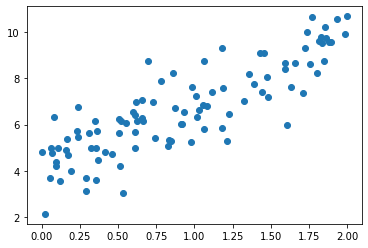

In [4]:
import matplotlib.pyplot as plt 

plt.scatter(X, y)

In [5]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.13223056],
       [2.77173102]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.13223056],
       [9.6756926 ]])

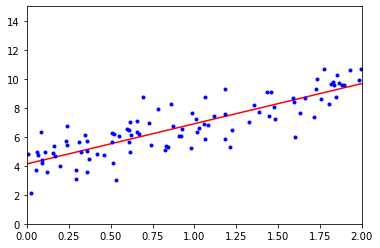

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.13223056]), array([[2.77173102]]))

In [10]:
lin_reg.predict(X_new)

array([[4.13223056],
       [9.6756926 ]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [12]:
theta_best_svd

array([[4.13223056],
       [2.77173102]])

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[4.13223056],
       [2.77173102]])

In [14]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[4.13223056],
       [2.77173102]])

In [16]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i) 
        theta = theta - eta * gradients
    
    

In [17]:
theta

array([[4.16187717],
       [2.7571261 ]])

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16328259]), array([2.83644896]))

In [20]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

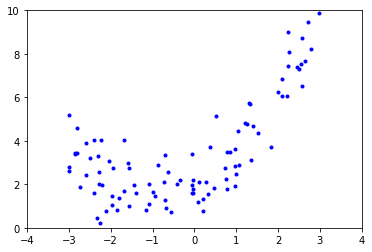

In [25]:
plt.plot(X, y, "b.")
plt.axis([-4, 4, 0, 10])
plt.show()

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.69567594])

In [28]:
X_poly[0]

array([-0.69567594,  0.48396502])

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.96644464]), array([[1.01306485, 0.52394317]]))